# 2. The Simple Regression Model

## 2.1 Simple OLS Regression

$$y = \beta_0 + \beta_1x + u$$

$$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$$

$$\hat{\beta_1}=\frac{Cov(x,y)}{Var(x)}$$

$$\hat{y}=\hat{\beta_0}+\hat{\beta_1}x$$

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

|Y|X|
|---|---|
|Dependent variable|Independent variable|
|Explained variable|Explanatory variable|
|Response variable|Control variable|
|Predicted variable|Predictor variable|
|Regressand|Regressor|

#### <center>Table 2.1 Terminology for Simple Regression</center>

### Example 2.3
Estimate salary as a function of return on equity (roe). We will use pandas commands instead of the indicated numpy commands.

In [2]:
ceosal1 = woo.dataWoo("ceosal1")

names = ["salary", "roe"]

# select a smaller set of variables to reduce number of calculations.
data = ceosal1[names]
y_name,x_name = names
# calculate values to estimate beta1
cov_xy = data.cov()[y_name][x_name]
var_x = data.var()[x_name]
y_bar, x_bar = data.mean().values

b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

"b1: " + str(b1), "b0: " + str(b0)

('b1: 18.50118634521493', 'b0: 963.1913364725577')

The result indicates that an additional unit of _roe_ is associated with an additional 18.5 units of ceo _salary_.

### Regression with statsmodels

In [3]:
reg = smf.ols(formula = "salary ~ roe", data = ceosal1)
results = reg.fit()
results.params

Intercept    963.191336
roe           18.501186
dtype: float64

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 24 Jun 2022   Prob (F-statistic):             0.0978
Time:                        09:15:00   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In these notebooks, we will use the alternate format. We will frames the problem through code structure instead of using the formula option.

In [5]:
y = data[[y_name]]
X = data[[x_name]]
# add column of 1s to data that will be used to estimate intercept
X["Intercept"] = 1

In [6]:
reg = sm.OLS(y ,X)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 24 Jun 2022   Prob (F-statistic):             0.0978
Time:                        09:15:00   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It would be convenient to call a smaller table. Let's build a function to return a rudimentary set of results: the paramter, t, p, and standard error values along with the explained variance ($r^2$).

In [7]:
def OLS_summary(results):
    summary = {"$\\beta $":results.params, 
               "$t$": results.tvalues,
               "$$P>|t|$$":results.pvalues,
               # calculate standard errors by taking the square root of the variance values 
               # along the diagonal of the covariance matrix 
              "$SE$":[results.cov_params()[var][var] ** (.5) for var in results.cov_params()]}
    summary = pd.DataFrame(summary)
    # add r^2 using index name
    summary.index.name = "$$r^2: "+str(round(results.rsquared,3)) + "$$"
    return summary.round(3)
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.013$$,,,,
roe,18.501,1.663,0.098,11.123
Intercept,963.191,4.517,0.000,213.240


### <a id='Estimatora'>[<div title="Estimator: A rule for combining data to produce a numerical value for a population parameter; the form of the rule does not depend on the particular sample obtained.">Plotting the Estimator</div>](#Estimatorb)</a>

In [8]:
results.fittedvalues

0      1224.058071
1      1164.854261
2      1397.969216
3      1072.348338
4      1218.507712
          ...     
204    1129.702014
205    1249.959725
206    1187.055698
207    1216.657586
208    1229.608413
Length: 209, dtype: float64

In [9]:
data["$$\widehat{salary}$$"] = results.fittedvalues
data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\3878600985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{salary}$$"] = results.fittedvalues


,salary,roe,$$\widehat{salary}$$
0,1095,14.1,1224.058071
1,1001,10.9,1164.854261
2,1122,23.5,1397.969216
3,578,5.9,1072.348338
4,1368,13.8,1218.507712
...,...,...,...
204,930,9.0,1129.702014
205,525,15.5,1249.959725
206,658,12.1,1187.055698
207,555,13.7,1216.657586


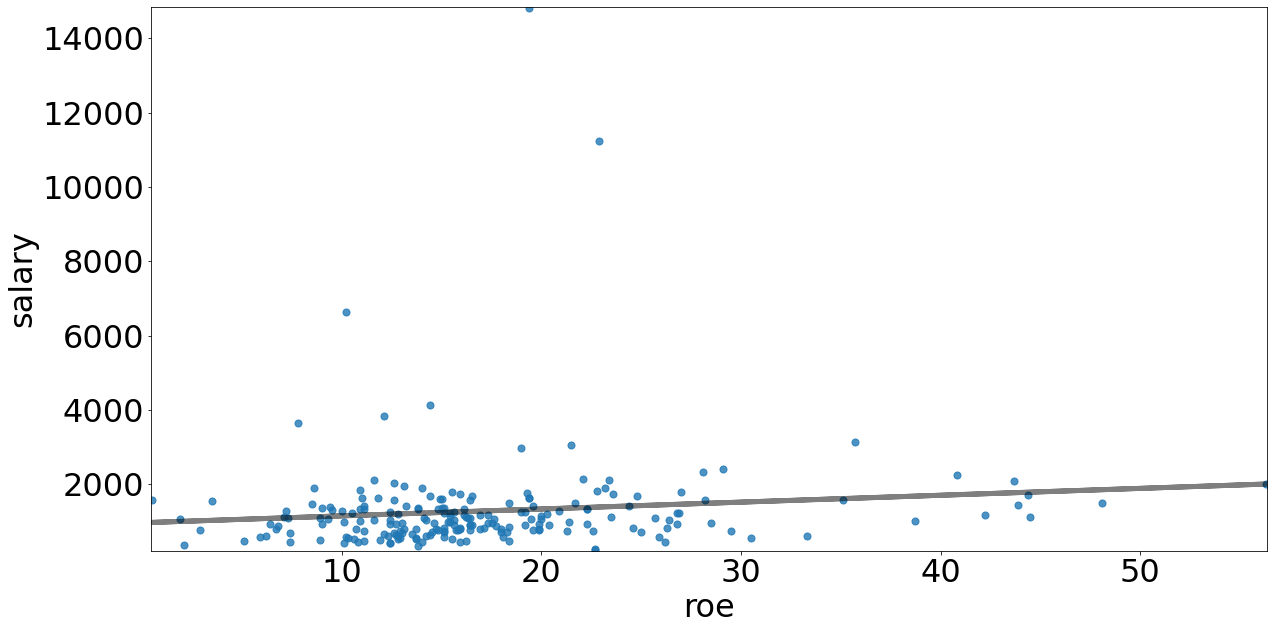

In [10]:
plt.rcParams['axes.xmargin'] = 0.001
plt.rcParams['axes.ymargin'] = 0.001
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (20,10))
data.plot.scatter(x="roe",
                  y="salary",
                  alpha = .8,
                  s = 50,
                  ax = ax)
ax.plot(data["roe"], data["$$\widehat{salary}$$"], 
        color = "k",
        linewidth = 5,
       alpha = .5)

### Build a Function for Plotting a Scatterplot with the Estimator

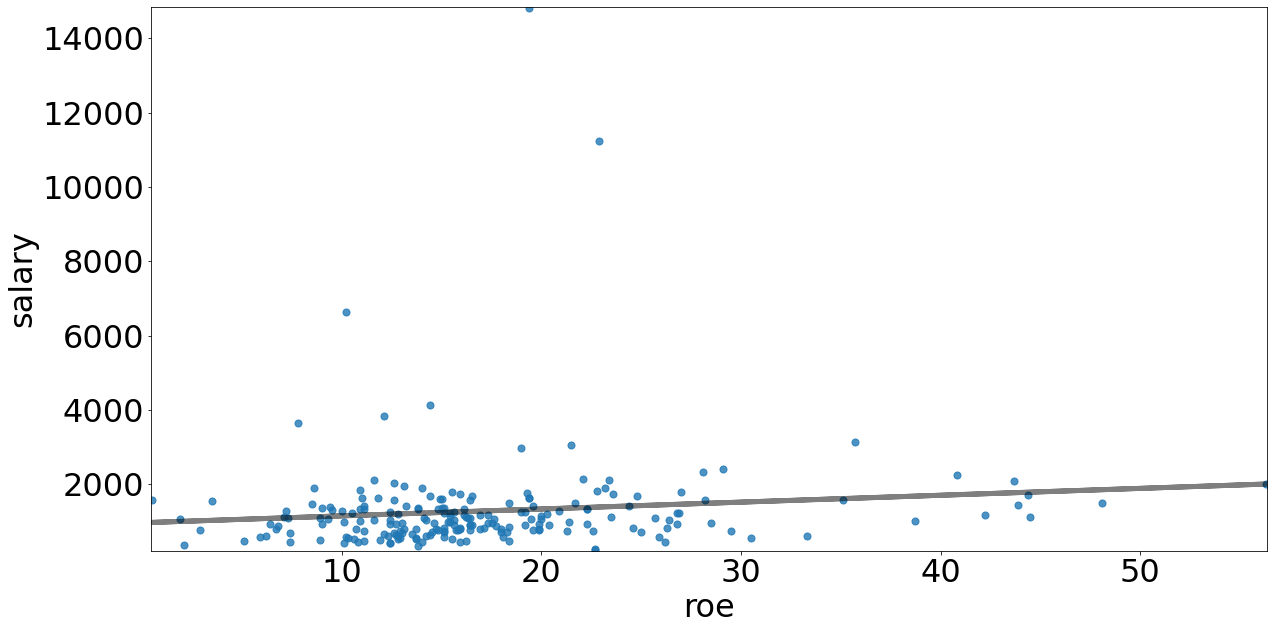

In [11]:
def plot_estimator_and_observations(data, y_name, x_name):    
    fig, ax = plt.subplots(figsize = (20,10))
    estimator_name ="$$\widehat{"+ y_name + "}$$"
    data.plot.scatter(x=x_name,
                      y=y_name,
                      alpha = .8,
                      s = 50,
                      ax = ax)
    ax.plot(data[x_name], data[estimator_name], 
            color = "k",
            linewidth = 5,
           alpha = .5)
plot_estimator_and_observations(data, "salary", "roe")

### Example 2.4: Wage and Education

$$wage = \beta_0 + \beta_1education + u$$

$$\widehat{wage}= -0.90 + (0.54)educaiton$$

Before we build the next regression, let's build a function to construct our X and y matrices

In [12]:
# include options for logging particular variables and including a constant.
def build_X_y_matrices(data, names, log_vars = None, constant = True):
    if type(log_vars) is list:
        for name in log_vars:
            data[name] = np.log(data[name])
    y_name, x_names = names[0], names[1:]
    X = data[x_names]
    if constant:
        X["Intercept"] = 1
    y = data[[y_name]]
    
    return X, y

In [13]:
wage1 = woo.dataWoo("wage1")

names = ["wage","educ"]
data = wage1[names]
X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()

In [14]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.165$$,,,,
educ,0.541,10.167,0.000,0.053
Intercept,-0.905,-1.321,0.187,0.685


### Example 2.5: Voting Outcomes and Campaign Expenditure

$$voteA = \beta_0 + \beta_1shareA + u$$

$$\widehat{voteA}=26.81+(0.464)shareA$$

In [15]:
vote1 = woo.dataWoo("vote1")
names = ["voteA","shareA"]
data = vote1[names]
X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()

OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.856$$,,,,
shareA,0.464,31.901,0.0,0.015
Intercept,26.812,30.221,0.0,0.887


In [16]:
y_name, x_name = names
data["$$\widehat{"+y_name + "}$$"] = results.fittedvalues
data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\3915166688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{"+y_name + "}$$"] = results.fittedvalues


,voteA,shareA,$$\widehat{voteA}$$
0,68,97.407669,71.992513
1,62,60.881039,55.050478
2,73,97.014763,71.810272
3,69,92.403702,69.671538
4,75,72.612473,60.491833
...,...,...,...
168,39,17.383217,34.875018
169,32,5.916420,29.556409
170,36,13.378174,33.017371
171,38,31.010078,41.195523


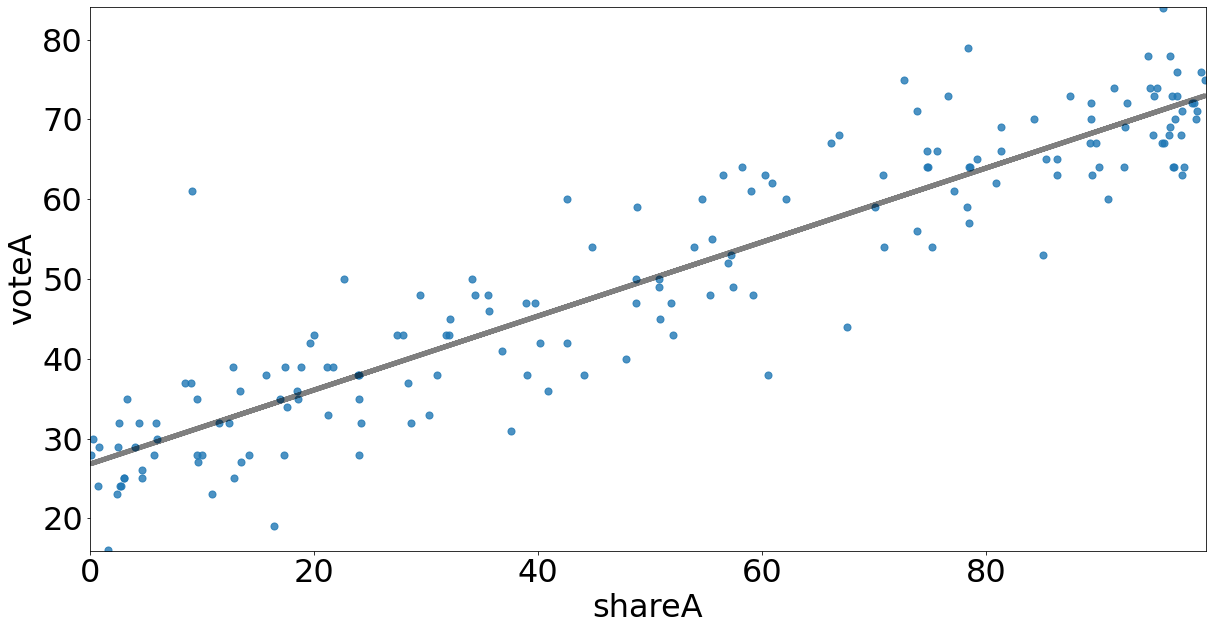

In [17]:
plot_estimator_and_observations(data, y_name, x_name)

## 2.2 Coefficients, Fitted Values, and Residuals

$$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_1 $$

$$ \hat{u_i} = y_i - \hat{y_i} $$


In [18]:
def build_estimator(data, x_name, y_name, reg_results):
    df = data.copy()
    b = reg_results.params
    if x_name == "Intercept":
        y_hat = b["Intercept"]
    else:
        if "Intercept" not in b:
            b["Intercept"] = 0
        y_hat = df[x_name].mul(b[x_name]).add(b["Intercept"]) 
    df["$$\widehat{" + y_name + "}$$"] = y_hat
    df["$$\hat{u}$$"] = df[y_name].sub(y_hat)
    return df

In [19]:
names = ["salary", "roe"]
data = ceosal1[names]
X, y = build_X_y_matrices(data, names)


reg = sm.OLS(y, X)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.013$$,,,,
roe,18.501,1.663,0.098,11.123
Intercept,963.191,4.517,0.000,213.240


In [20]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)


In [21]:
data

,salary,roe,$$\widehat{salary}$$,$$\hat{u}$$
0,1095,14.1,1224.058071,-129.058071
1,1001,10.9,1164.854261,-163.854261
2,1122,23.5,1397.969216,-275.969216
3,578,5.9,1072.348338,-494.348338
4,1368,13.8,1218.507712,149.492288
...,...,...,...,...
204,930,9.0,1129.702014,-199.702014
205,525,15.5,1249.959725,-724.959725
206,658,12.1,1187.055698,-529.055698
207,555,13.7,1216.657586,-661.657586


### Example 2.7: Wage and Education

In [22]:
names = ["wage", "educ"]
data = wage1[names]
X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y, X)
results = reg.fit()


y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
u_hat_mean = data["$$\hat{u}$$"].mean()

OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.165$$,,,,
educ,0.541,10.167,0.000,0.053
Intercept,-0.905,-1.321,0.187,0.685


In [23]:
data.cov()

,wage,educ,$$\widehat{wage}$$,$$\hat{u}$$
wage,13.638884,4.150864e+00,2.247109e+00,1.139178e+01
educ,4.150864,7.667485e+00,4.150864e+00,-1.624098e-15
$$\widehat{wage}$$,2.247109,4.150864e+00,2.247109e+00,-1.218073e-15
$$\hat{u}$$,11.391776,-1.624098e-15,-1.218073e-15,1.139178e+01


In [24]:
u_hat_mean =  data.mean()["$$\hat{u}$$"]
educ_u_cov = data.cov()["educ"]["$$\hat{u}$$"]
educ_mean, wage_mean = data.mean()["educ"], data.mean()["wage"]
wage_predict = educ_mean * results.params["educ"] + results.params["Intercept"]
u_hat_mean, educ_u_cov, educ_mean, wage_mean, wage_predict

(-4.255151364342805e-15,
 -1.6240976817373718e-15,
 12.562737642585551,
 5.896102674787035,
 5.896102674787039)

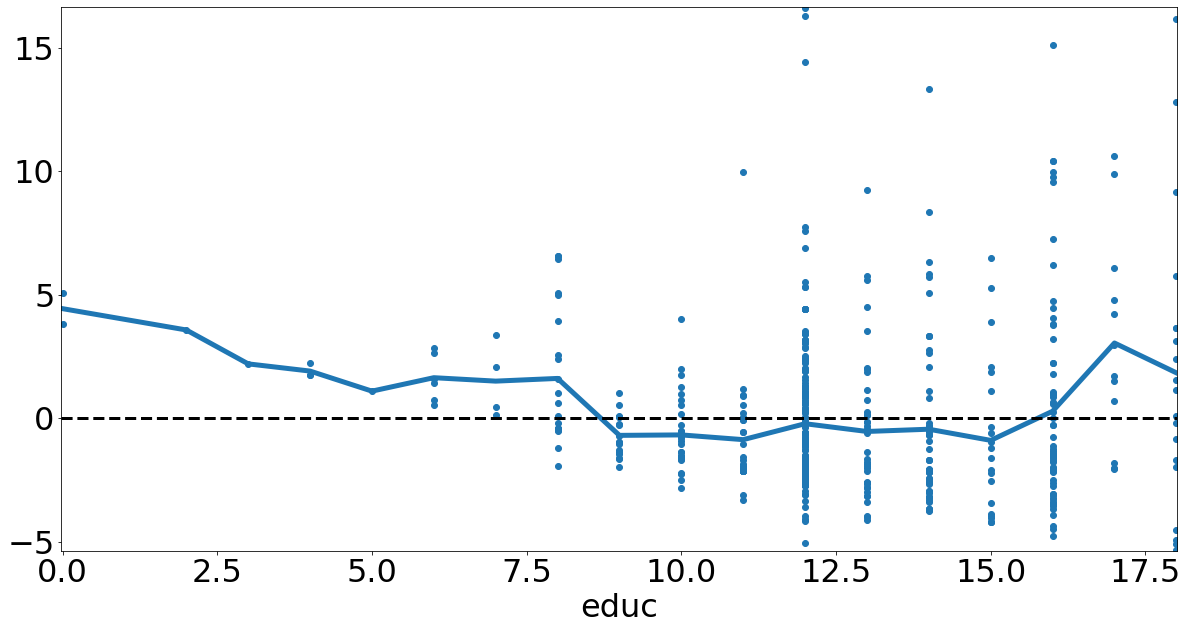

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(x = data["educ"], y = data["$$\hat{u}$$"])
# ax.plot(
data.groupby("educ").mean()["$$\hat{u}$$"].plot.line(ax = ax, linewidth = 5)
ax.axhline(0, ls = "--", color = "k", linewidth = 3)

## 2.3 Goodness of Fit

<a id='SSTa'>[$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2 = (n-1)Var(y)$](#SSTb)</a>

<a id='SSEa'>[$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2 = (n-1)Var(\hat{y})$](#SSEb)</a>

<a id='SSRa'>[$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2 = (n-1)Var(\hat{u})$](#SSRb)</a>


<a id = 'r2a'>[$R^2 = \frac{Var(\hat{y})}{Var(y)} = 1 - \frac{Var(\hat{u})}{Var(y)}$](#r2b)</a>

## Example 2.8: CEO Salary and Return on Equity

In [26]:
names = ["salary", "roe"]
data = ceosal1[names]
X, y = build_X_y_matrices(data, names)


reg = sm.OLS(y,X)
results = reg.fit()

OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.013$$,,,,
roe,18.501,1.663,0.098,11.123
Intercept,963.191,4.517,0.000,213.240


In [27]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
data.keys()

Index(['salary', 'roe', '$$\widehat{salary}$$', '$$\hat{u}$$'], dtype='object')

In [28]:
def calculate_r2(data, y_name):
    y = data[[y_name]]
    y_hat_name = "$$\widehat{" + y_name + "}$$"
    e_hat_name = "$$\hat{u}$$"
    y_hat = data[y_hat_name]
    
    r2 = y_hat.var() / y.var()[0]
#     r2b = 1 - data[e_hat_name].var() / data[y_name].var()
#     r2c = data[[y_name, y_hat_name]].corr().pow(2)[y_name][y_hat_name]

    return r2

calculate_r2(data, y_name)   

0.013188624081034083

In [29]:
results.rsquared

0.01318862408103405

### Example 2.9: Voting Outcomes and Campaign Expenditures

In [30]:
names = ["voteA","shareA"]
data = vote1[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.856$$,,,,
shareA,0.464,31.901,0.0,0.015
Intercept,26.812,30.221,0.0,0.887


## 2.4 Nonlinearities


| Model | Dependent Variable| Independent Variable | Interpretation of $\beta_1$| 
| --- | --- | --- | --- |
| Level-level | $$y$$ | $$x$$ | $$\Delta y = \beta_1 \Delta x $$|
| Level-log| $$y$$ | $$log(x)$$ | $$\Delta y = \frac{\beta_1}{100}\%\Delta x$$|
| Log-level | $$log(y)$$ | $$x$$ | $$\%\Delta y = 100\beta_1 \Delta x$$|
| Log-log | $$log(y)$$ | $$log(x)$$ | $$\%\Delta y = \beta_1\%\Delta x$$|

#### <center> Table 2.3 Summary of Functional Forms </center>

### Semi-log: Regression with Logged Dependent Variable

Next we will log the y-variable. We interpret the estimated paramter for the x-variable as indicating the percentage change in $y$ that results froma 1 unit change in $x$.

$$ln(y)=\beta_0+\beta_1x_1$$



In [31]:
names = ["wage","educ"]
log_vars = ["wage"]
data = wage1[names]
# log y variable

X, y = build_X_y_matrices(data, names, log_vars = log_vars)

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\2606058182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = np.log(data[name])


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.186$$,,,,
educ,0.083,10.935,0.0,0.008
Intercept,0.584,5.998,0.0,0.097


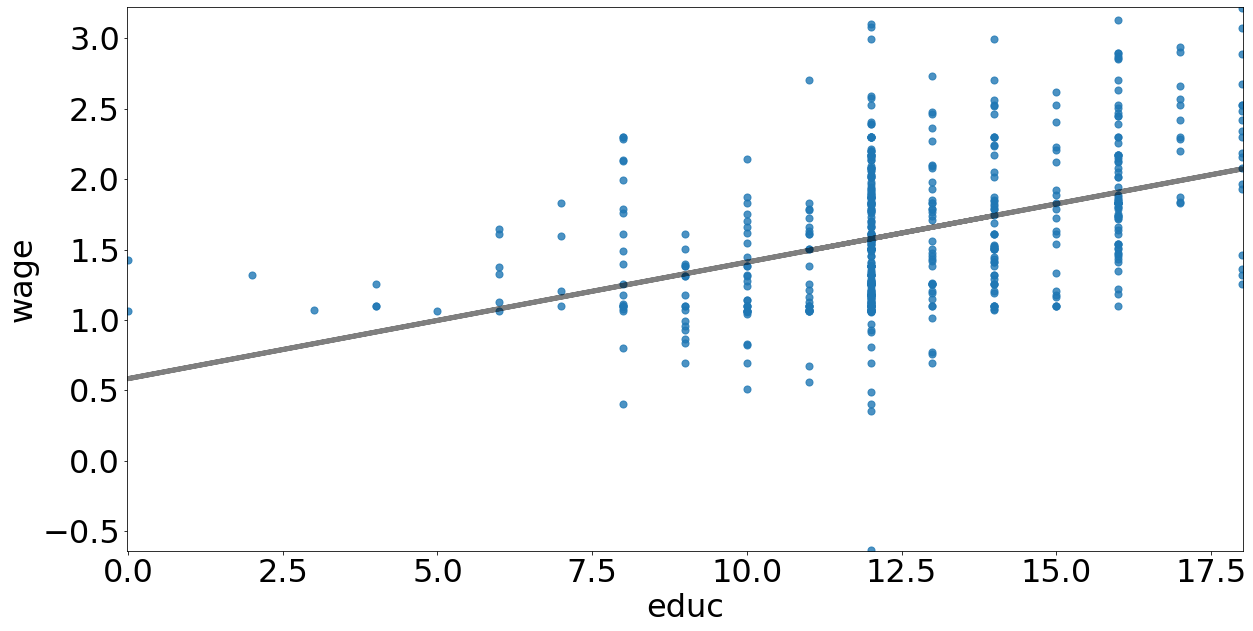

In [32]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
plot_estimator_and_observations(data, y_name, x_name)

### Log-log: Logging Dependent and Explanatory Variables

Next we will log both the y-variable and the x-variable. Estimates will indicate cross-elasticities. We interpret the paramter estimate of the x-variable as indicating a percent change response in the y-variable from a 1% change in the x-variable.

$$ln(y)=\beta_0+\beta_1ln(x_1)$$

In [33]:
names = ["salary", "sales"]
log_vars = names
data = ceosal1[names]
X, y = build_X_y_matrices(data, names, log_vars = log_vars)

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\2606058182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = np.log(data[name])


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.211$$,,,,
sales,0.257,7.436,0.0,0.035
Intercept,4.822,16.723,0.0,0.288


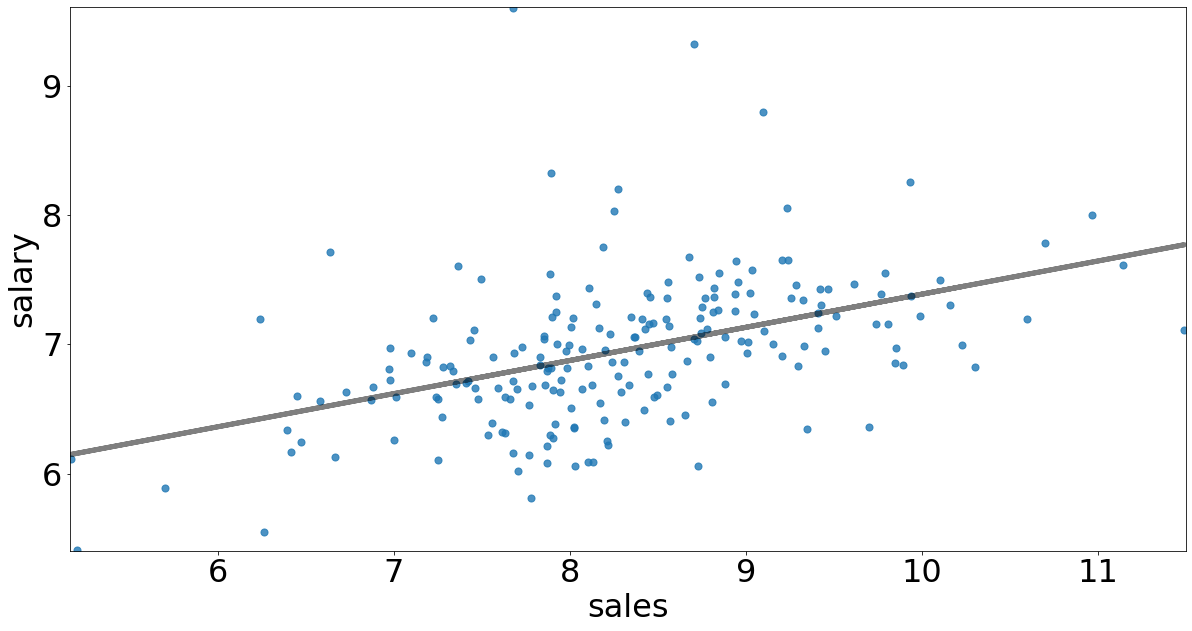

In [34]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
plot_estimator_and_observations(data, y_name, x_name)

## Regression through the Origin and Regression on a Constant

So far, we have included a constant and an explanatory variable in our regression. We can also run regressions that include 1) no constant or 2) only a constant. Using no constant, we assume that the constant = 0.

### Regression Through the Origin

Let's regress the logged value of wages on years of education with no constant.

$$ln(y)=\beta_1x_1$$

In [35]:
names = ["wage","educ"]
log_vars = ["wage"]
data = wage1[names]

X, y = build_X_y_matrices(data, names, log_vars = log_vars, constant = False)


reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\2606058182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = np.log(data[name])


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.916$$,,,,
educ,0.127,75.608,0.0,0.002


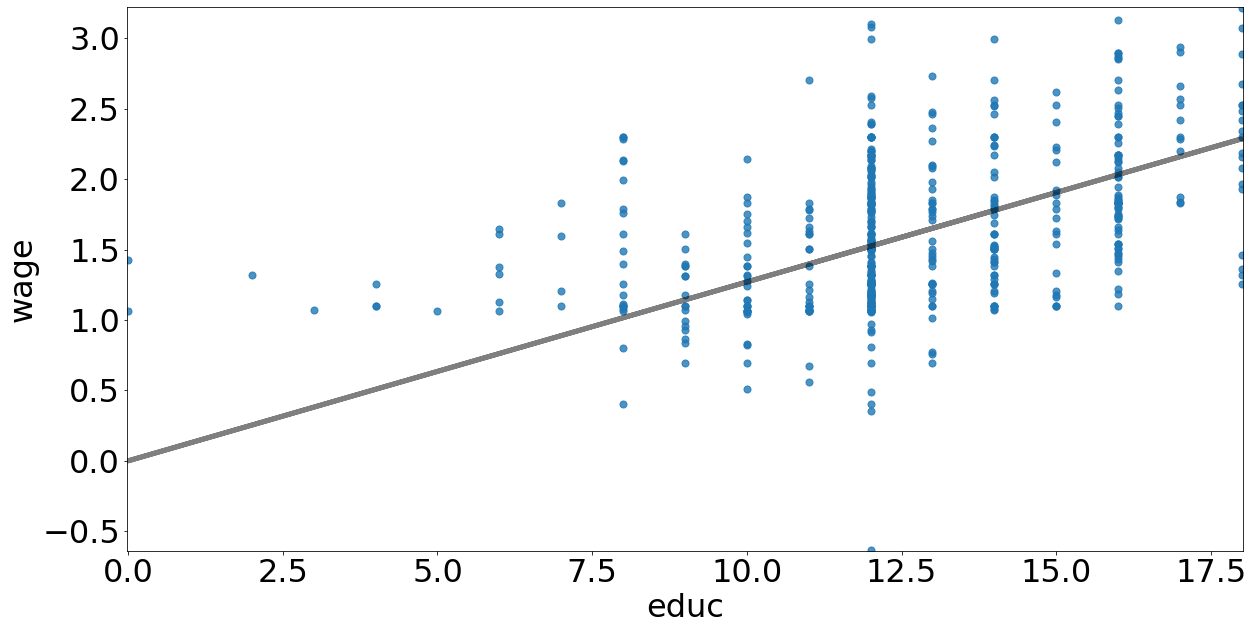

In [36]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
plot_estimator_and_observations(data, y_name, x_name)

Lets take the average wage for each level of education and compare it to the fitted line.

We see that starting at 9 years of education, this line tends to follow the average wage groubped by years of education.

<AxesSubplot:xlabel='educ', ylabel='wage'>

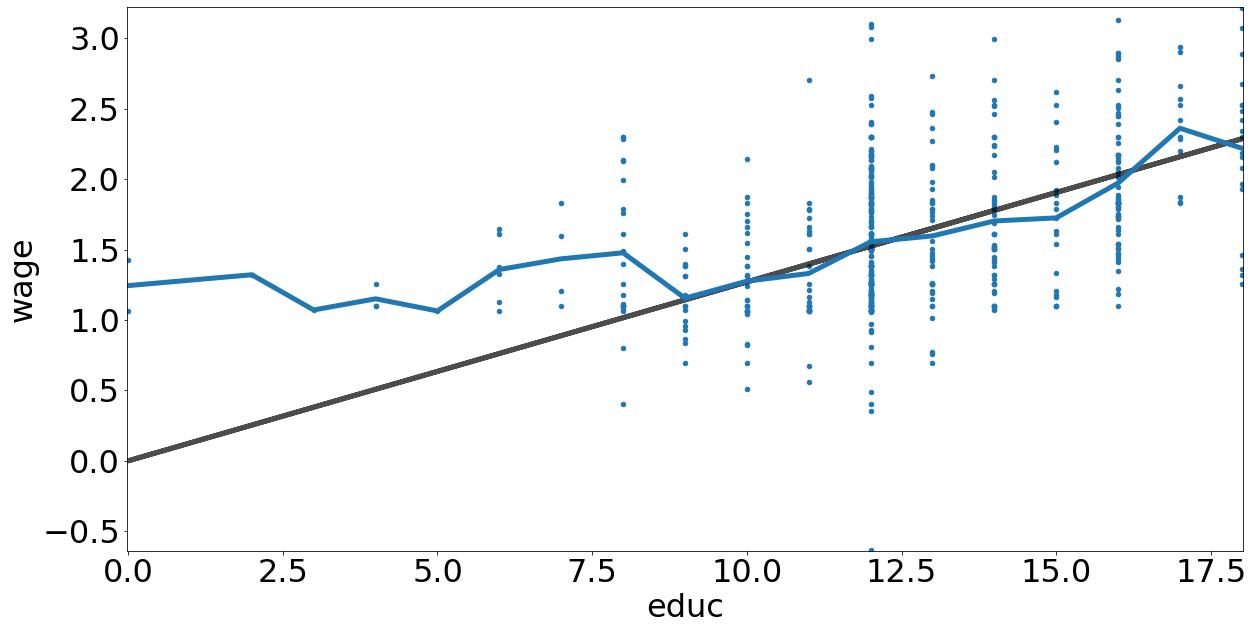

In [37]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.scatter(x = "educ", y = "wage", ax=ax)
ax.plot(data["educ"], data["$$\widehat{wage}$$"], color = "k", alpha = .7, linewidth = 5)
data.groupby("educ").mean()["wage"].plot.line(linewidth = 5, 
                                              ax=ax)

Returning to the book example, let's _salary_ on _roe_.

In [38]:
names = ["salary", "roe"]
data = ceosal1[names]


X, y = build_X_y_matrices(data, names, constant = False)

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.422$$,,,,
roe,63.538,12.324,0.0,5.156


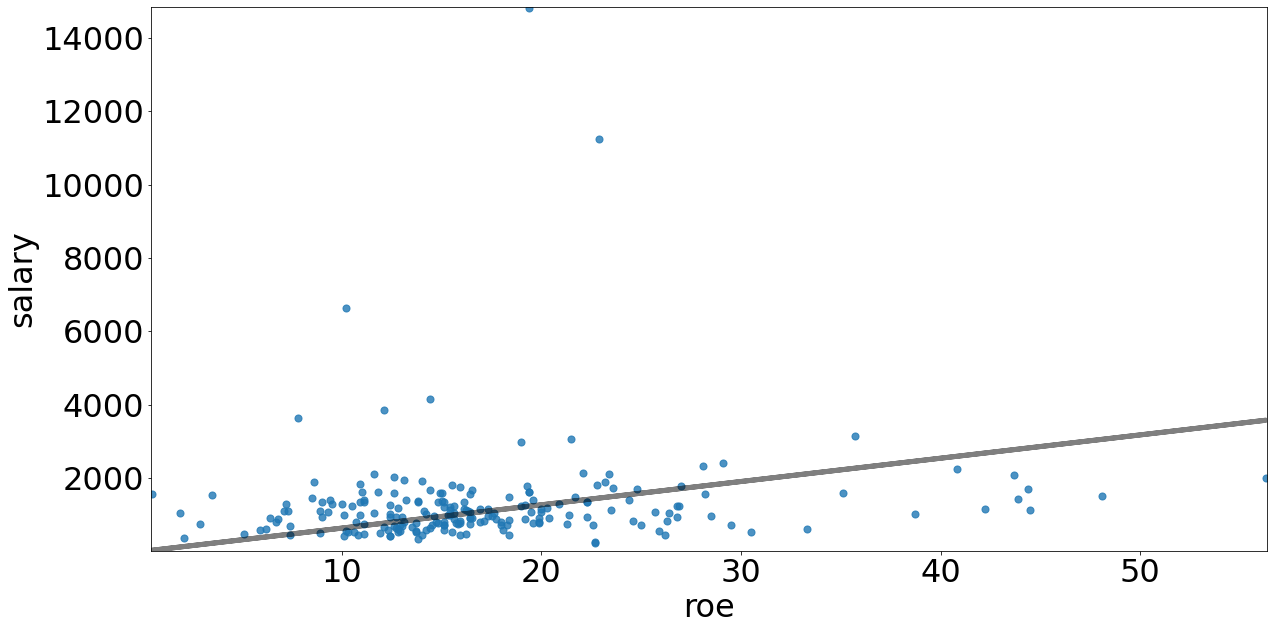

In [39]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
plot_estimator_and_observations(data, y_name, x_name)

Compare this to the regression that also includes the intercept

In [40]:
X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\2606058182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.013$$,,,,
roe,18.501,1.663,0.098,11.123
Intercept,963.191,4.517,0.000,213.240


### Regression on a Constant

In [41]:
names = ["salary", "Intercept"]
y_name, x_name = names

X[x_name] = 1
X = X[[x_name]]

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19664\2836352055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x_name] = 1


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: -0.0$$,,,,
Intercept,1281.12,13.496,0.0,94.927


Notice that the intercept is equivalent to the average of the dependent variable.

In [42]:
y.mean()

salary    1281.119617
dtype: float64

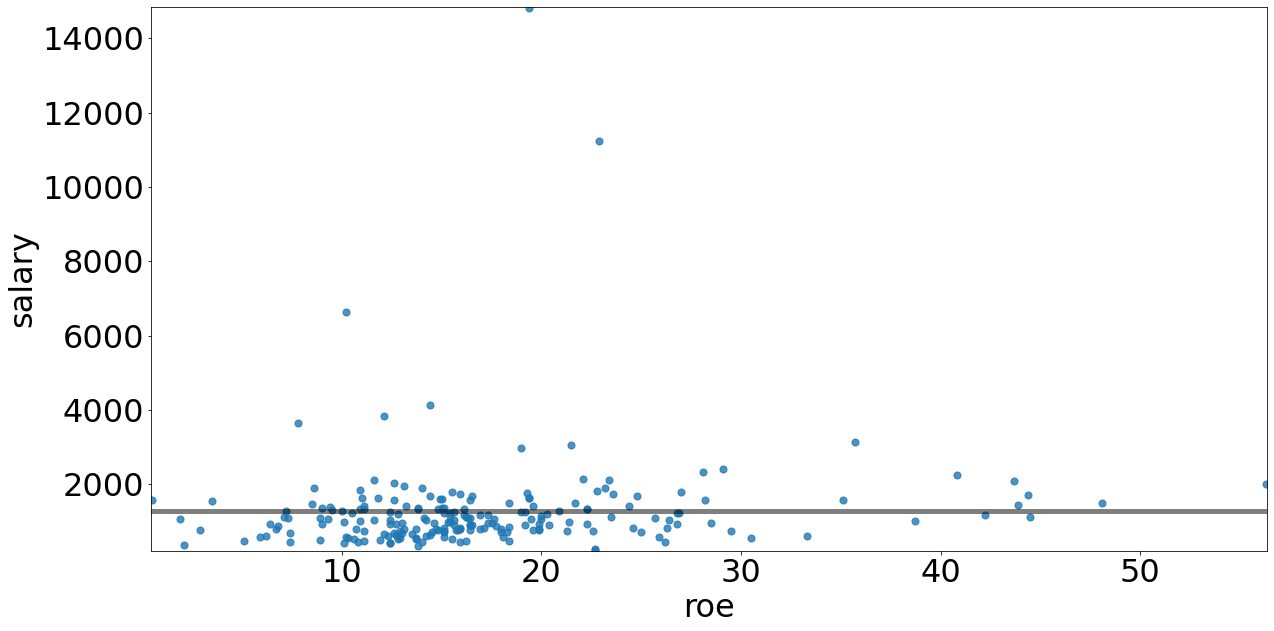

In [43]:
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
# must plot over a variable other than "Intercept"
plot_estimator_and_observations(data, y_name, "roe")

## 2.6 Expected Values, Variances, and Standard Errors
### <center>Gauss-Markov Assumptions</center>

|Assumption No.|Brief Summary|Description|
|---|---|---|
|$SLR.1$| Linear in Parameters: $y = \beta_0 + \beta_1x+u$| In the population model, the dependent variable, $y$, is related to the independent variable, $x$, and the error term, $u$ where $\beta_0$ and $\beta_1$ are the population intercept and slope parameters, respectively.|
|$SLR.2$| Random Sampling of $x$ and $y$ from the Population|We have a random sample of size $n$, ${(x_i,y_i): i = 1,2,...,n}$, following the population model in Assumption SLR.1.|
|$SLR.3$| Variation in the Sample Values $x_1, ..., x_n$|The sample outcomes on $x$, nameley, ${x_i, i = 1, ..., n}$, are not all the same|
|$SLR.4$| Zero Conditional Mean: $E(u|x)=0$|The error $u$ has an expected value of zero given any value of the explanatory variable|
|$SLR.5$| Homoscedasticity: $Var(u|x) = \sigma^2$|The error $u$ has constant variance given any value of the explanatory variable|

### <center>Properties of OLS</center>
|Theorem No.|Description|
|---|---|
|Theorem 2.1| Under $SLR.1-SLR.4$, OLS parameter estimators are unbiased|
|Thereom 2.2| Under $SLR.1-SLR.5$, OLS parameter estimators have a specific sampling variance. Because $u_i$ are independent, the variance of the sum is the sum of the variances|
|Thereom 2.3| Under $SLR.1-SLR.5$, variance of estimator is unbiased: $E(\hat{\sigma}^2) = \sigma^2$|



Standard Error of the Regression (Estimator Variance):
### $\hat{\sigma}^2 = \frac{1}{n-2}\sum_{i=1}^{n}{\hat{u_i}}^2 = \frac{n-1}{n-2}Var(\hat{u_i})$

Standard Error of the Estimators:
### $se(\hat{\beta_0})=\sqrt{\frac{\hat{\sigma}^2\bar{x^2}}{\sum_{i=1}^{n}{(x-\bar{x})^2}}}=\frac{1}{\sqrt{n-1}}\frac{\hat{\sigma}}{sd(x)}\sqrt{\bar{x^2}}$

### $se(\hat{\beta_1})=\sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^{n}{(x-\bar{x})^2}}}=\frac{1}{\sqrt{n-1}}\frac{\hat{\sigma}}{sd(x)}$

Standard Errors of estimators can be drawn from the diagnoal of the covariance matrix, $\sigma^2(X'X)^{-1}$.

### Example 2.12: Student Math Performance and the School Lunch Program

In [44]:
meap93 = woo.dataWoo("meap93")

names = ["math10", "lnchprg"]
data = meap93[names]

X, y = build_X_y_matrices(data, names)

reg = sm.OLS(y,X)
results = reg.fit()

In [45]:
n = results.nobs
y_name, x_name = names
data = build_estimator(data, x_name, y_name, results)
u_hat_var = data["$$\hat{u}$$"].var()

# calculate estimator variance, 
# then take sqrt to calculate ser
est_variance = u_hat_var * (n- 1) / (n - 2)
ser = np.sqrt(est_variance)
u_hat_var, ser

(91.28234524793183, 9.565938459482764)

In [46]:
lnchprg_sq_mean = X[x_name].pow(2).mean()
lnchprg_var = X[x_name].var()
lnchprg_sq_mean , lnchprg_var 

(819.894266376284, 185.2341517609967)

In [47]:
b1_se = ser / (np.sqrt(lnchprg_var) * np.sqrt(n-1)) * np.sqrt(lnchprg_sq_mean)
b0_se = ser / (np.sqrt(lnchprg_var) * np.sqrt(n-1))

b1_se, b0_se

(0.9975823856755016, 0.034839334258369645)

In [48]:
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.171$$,,,,
lnchprg,-0.319,-9.152,0.0,0.035
Intercept,32.143,32.221,0.0,0.998


## 2.7 Monte Carlo Simulations

### 2.7.1. One Sample

In [49]:
n = 10000

b0 = 1
b1 = 0.5

su = 1

x = stats.norm.rvs(1, 1, size = n)
u = stats.norm.rvs(0, su, size = n)
y = b0 + b1 * x + u
y_name = "y"
x_name = "x"
data = pd.DataFrame({y_name:y,
                  x_name:x})

# estimate parameters
y = data[[y_name]]
X = data[[x_name]]
X["Intercept"] = 1

reg = sm.OLS(y,X)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.205$$,,,,
x,0.502,50.732,0.0,0.010
Intercept,1.018,72.336,0.0,0.014


In [50]:
def plot_errors(data):
    keys = list(data.keys())[:-2]
    y_name, x_names = [keys[0]],keys[1:]
    # matplotlib rejects keys with $$, replace with $
    data.rename(columns = {key:key.replace("$$","$") for key in keys}, 
                inplace = True)
    for x_name in x_names:    
        fig, ax = plt.subplots(figsize = (20,10))
        data.rename(columns = {"$$\hat{u}$$":"$\hat{u}$"}).plot.scatter(x = x_name, 
                                                                        y = "$\hat{u}$", 
                                                                        ax = ax)
        # Check SLR4
        error_corr = data.corr().round(2)["$$\hat{u}$$"][x_name]
        plt.title("Correlation: " + str(error_corr))

#### We can show that this randomly generated data meets the criteria of $SLR.4$ that $E(u|x)=0$

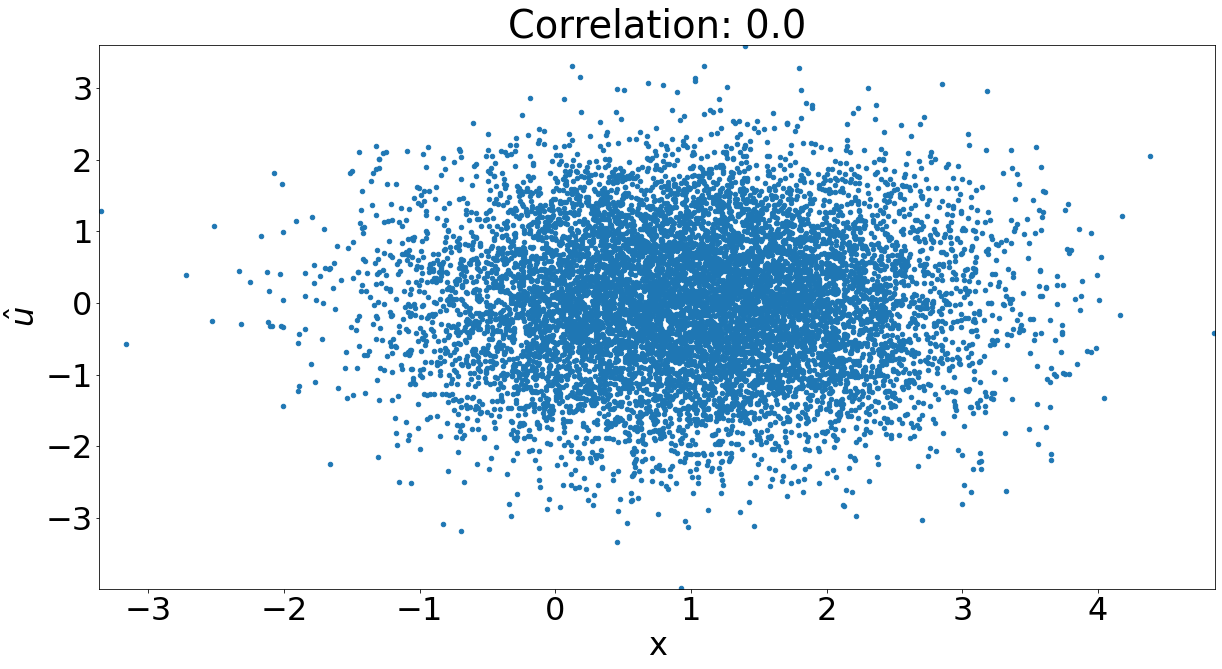

In [51]:
data = build_estimator(data, x_name, y_name, results)
plot_errors(data)

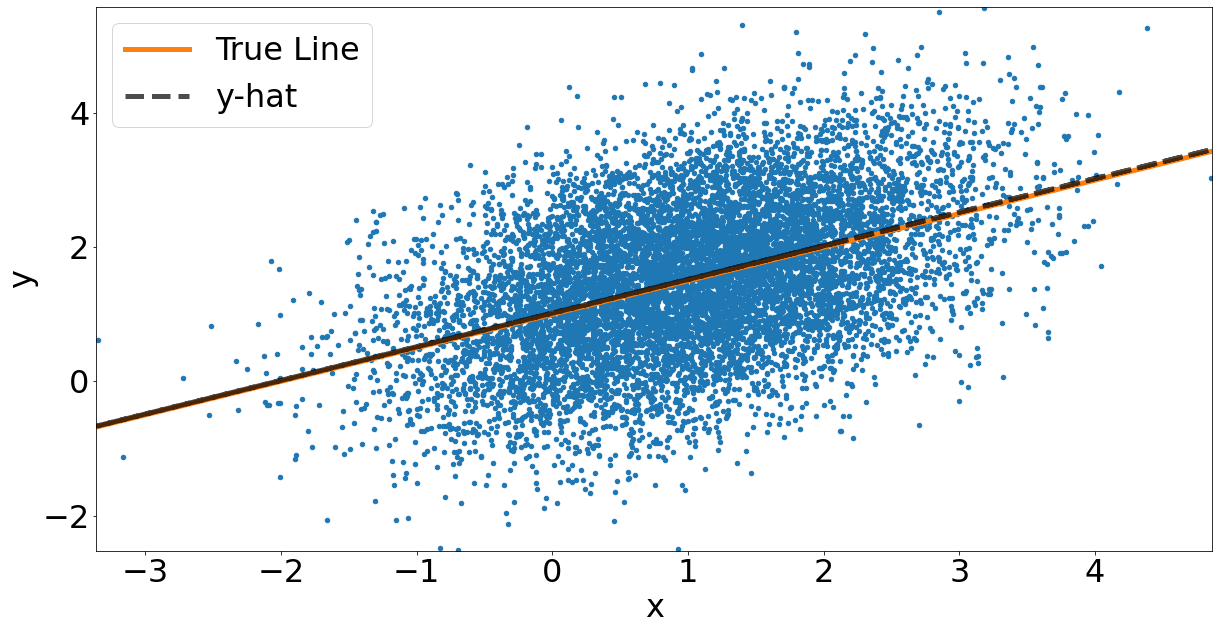

In [52]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.scatter(x = x_name, y = y_name, ax=ax)
x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
y = b0 + b1 * x
ax.plot(x,y, color = "C1", linewidth = 5, label = "True Line")
ax.plot(data[x_name], data["$$\widehat{" + y_name + "}$$"], color = "k", alpha = .7, linewidth = 5, ls = "--", label = "y-hat")
plt.legend()

## 2.7.2. Many Samples

Next, we will estimate many ols estimators and show that the average of these is the _true estimator_ of y, which is approximately the _true line_.

In [53]:
n = 1000
r = 10000

b0 = 1
b1 = 0.5
su = 2

b0s = np.empty(r)
b1s = np.empty(r)


x = stats.norm.rvs(1, 1, size = n)

for i in range(r):
    
    u = stats.norm.rvs(0, su, size = n)
    y = b0 + b1 * x + u
    y_name = "y"
    x_name = "x"
    data = pd.DataFrame({y_name:y,
                      x_name:x})

    # estimate parameters
    y = data[[y_name]]
    X = data[[x_name]]
    X["Intercept"] = 1

    reg = sm.OLS(y,X)
    results = reg.fit()
    
    b0s[i] = results.params["Intercept"]
    b1s[i] = results.params["x"]

b0_mean = np.mean(b0s)
b1_mean = np.mean(b1s)

b0_var = np.var(b0s)
b1_var = np.var(b1s)

"b0: " + str(b0), "mean b0 estimates:" + str(b0_mean), "b0 estimate variance: " + str(b0_var)

('b0: 1',
 'mean b0 estimates:0.9992016166665784',
 'b0 estimate variance: 0.007715925517907061')

In [54]:
"b1: " + str(b1), "mean b1 estimates:" + str(b1_mean), "b1 estimate variance: " + str(b1_var)

('b1: 0.5',
 'mean b1 estimates:0.5007705876215156',
 'b1 estimate variance: 0.0040242896730817435')

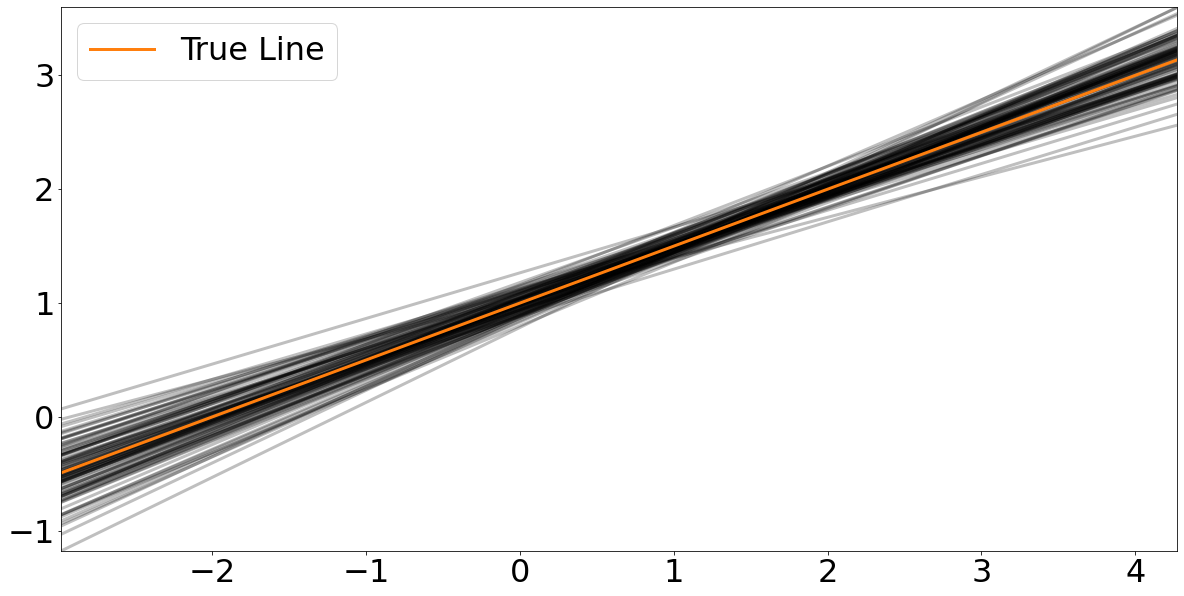

In [55]:
fig, ax = plt.subplots(figsize = (20,10))
for i in range(100):
    x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
    y = b0s[i] + b1s[i] * x
    ax.plot(x, y, color = "k", alpha = .25, linewidth = 3, ls = "-")#, label = "y-hat")
x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
y = b0 + b1 * x
ax.plot(x,y, color = "C1", linewidth = 3, label = "True Line")
plt.legend()

## 2.7.3. Violation of $SLR.4$ (assumption that $E(u) = 0$)

Suppose that $x$ is correlated with the error term, $u$, such that:

$$E(u|x) = \frac{x - 4}{5}$$

In [56]:
n = 1000
r = 10000

b0 = 1
b1 = 0.5
su = 2

b0s = np.empty(r)
b1s = np.empty(r)


x = stats.norm.rvs(1, 1, size = n)

for i in range(r):
    u_mean = np.array((x - 4)/5)
    u = stats.norm.rvs(u_mean, su, size = n)
    y = b0 + b1 * x + u
    y_name = "y"
    x_name = "x"
    data = pd.DataFrame({y_name:y,
                      x_name:x})

    # estimate parameters
    y = data[[y_name]]
    X = data[[x_name]]
    X["Intercept"] = 1

    reg = sm.OLS(y,X)
    results = reg.fit()
    
    b0s[i] = results.params["Intercept"]
    b1s[i] = results.params["x"]

b0_mean = np.mean(b0s)
b1_mean = np.mean(b1s)

b0_var = np.var(b0s)
b1_var = np.var(b1s)

"b0: " + str(b0), "mean b0 estimates:" + str(b0_mean), "b0 estimate variance: " + str(b0_var)

('b0: 1',
 'mean b0 estimates:0.20016423220558432',
 'b0 estimate variance: 0.007447639035223382')

In [57]:
"b1: " + str(b1), "mean b1 estimates:" + str(b1_mean), "b1 estimate variance: " + str(b1_var)

('b1: 0.5',
 'mean b1 estimates:0.6995948500392124',
 'b1 estimate variance: 0.0038029763874738295')

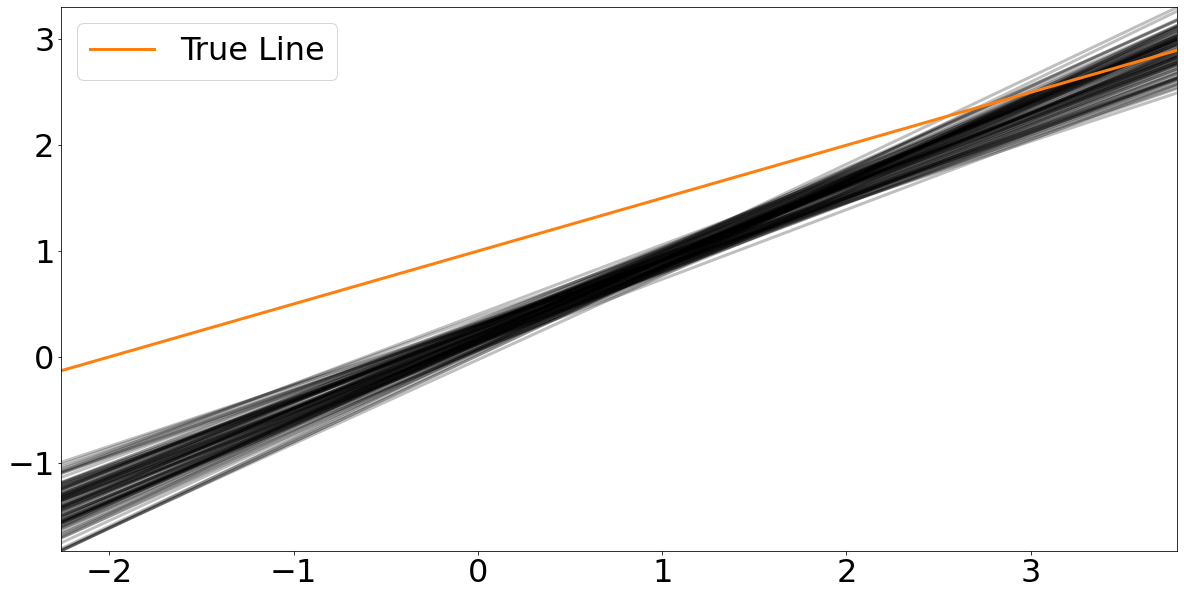

In [58]:
fig, ax = plt.subplots(figsize = (20,10))
for i in range(100):
    x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
    y = b0s[i] + b1s[i] * x
    ax.plot(x, y, color = "k", alpha = .25, linewidth = 3, ls = "-")#, label = "y-hat")
x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
y = b0 + b1 * x
ax.plot(x,y, color = "C1", linewidth = 3, label = "True Line")
plt.legend()

## 2.7.4. Violation of $SLR.5$ (assumption of homoskedasticity):

$$E(u|x) = \frac{4}{e^{4.5}}e^x$$

In [59]:
n = 1000
r = 10000

b0 = 1
b1 = 0.5
su = 2

b0s = np.empty(r)
b1s = np.empty(r)


x = stats.norm.rvs(1, 1, size = n)

for i in range(r):
    u_var = np.array(4/np.exp(4.5) * np.exp(x))
    u = stats.norm.rvs(0, np.sqrt(u_var), size = n)
    y = b0 + b1 * x + u
    y_name = "y"
    x_name = "x"
    data = pd.DataFrame({y_name:y,
                      x_name:x})

    # estimate parameters
    y = data[[y_name]]
    X = data[[x_name]]
    X["Intercept"] = 1

    reg = sm.OLS(y,X)
    results = reg.fit()
    
    b0s[i] = results.params["Intercept"]
    b1s[i] = results.params["x"]

b0_mean = np.mean(b0s)
b1_mean = np.mean(b1s)

b0_var = np.var(b0s)
b1_var = np.var(b1s)

"b0: " + str(b0), "mean b0 estimates:" + str(b0_mean), "b0 estimate variance: " + str(b0_var)

('b0: 1',
 'mean b0 estimates:1.000113583069163',
 'b0 estimate variance: 0.0003134738147308946')

In [60]:
"b1: " + str(b1), "mean b1 estimates:" + str(b1_mean), "b1 estimate variance: " + str(b1_var)

('b1: 0.5',
 'mean b1 estimates:0.49989722591484487',
 'b1 estimate variance: 0.000558996769166979')

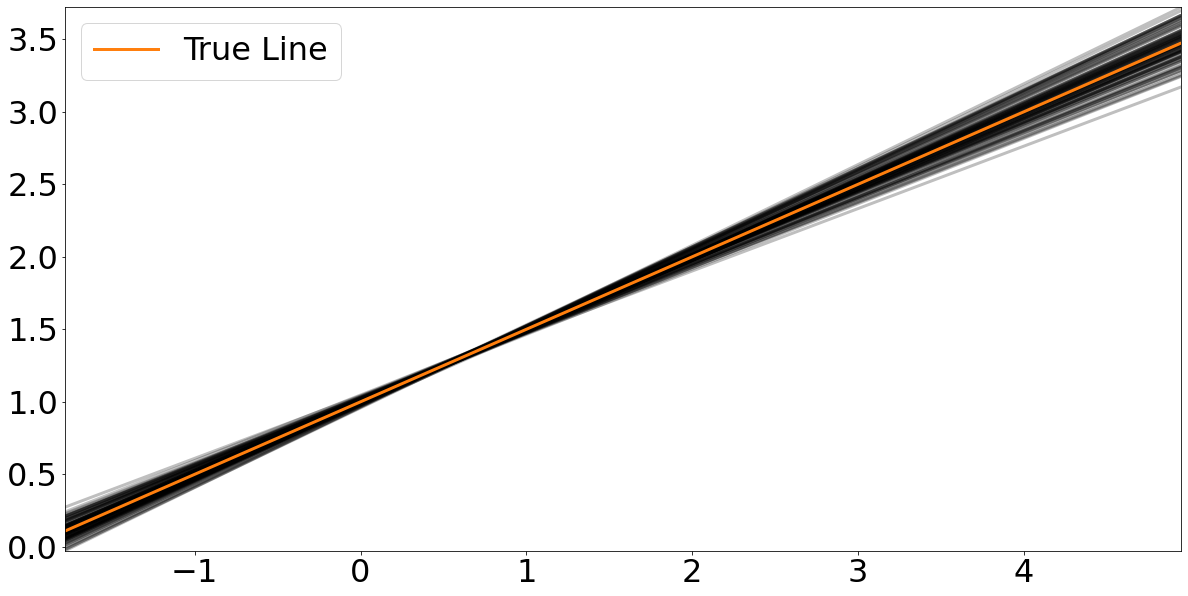

In [61]:
fig, ax = plt.subplots(figsize = (20,10))
for i in range(100):
    x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
    y = b0s[i] + b1s[i] * x
    ax.plot(x, y, color = "k", alpha = .25, linewidth = 3, ls = "-")#, label = "y-hat")
x = np.linspace(data[x_name].min(), data[x_name].max(), 1000)
y = b0 + b1 * x
ax.plot(x,y, color = "C1", linewidth = 3, label = "True Line")
plt.legend()

## Key Terms

Average Treatment Effect:

Average Causal Effect:

Binary (Dummy) Variable:

Causal (Treatment) Effect:

Coefficeint of Determination:

Constant Elasticity Model:

Control Group:

Control Variable:

Covariate:

Degrees of Freedom:

Dependent Variable:

Elasticity:

Error Term (Disturbance):

Error Variance:

<a id='SSEb'>[Explained Sum of Squares (SSE):](#SSEa)</a>

> The total sample variation of the fitted values in a multiple regression model.

<a id='Estimatorb'>[Estimator:](#Estimatora)</a>

> A rule for combining data to produce a numerical value for a population parameter; the form of the rule does not depend on the particular sample obtained.

Explained Variable:

Explanatory Variable:

First Order Conditions:

Fitted Value:

Gauss-Markov Assumptions:

Heteroskedasticity:

Homoskedasticity:

Independent Variable:

Intercept Parameter:

Mean Independent:

OLS Regression Line:

Ordinary Least Squares (OLS):

Population Regression Function (PRF):

Predicted Variable:

Predictor Variable:

Random Assignment:

Randomized Controlled Trial (RCT):

Regressand:

Regression through the Origin:

Regressor:

Residual:

Residual Sum of Squares (SSR):

Response Variable:

<a id = 'r2b'>[R-squared:](#r2a)</a>

> In a multiple regression model, the proportion of the total sample variation in the dependent variable that is explained by the independent variable.

Sample Regression Function (SRF):

Semi-elasticity:

Simple Linear Regression Model:

Slope Parameter:

Standard Error of $\beta_1$:

Standard Error of the Regression (SER):

<a id='SSRb'>[Sum of Squared Residuals (SSR):](#SSRa)</a>

> In multiple regression analysis, the sum of the squared OLS residuals across all observations.

<a id='SSTb'>[Total Sum of Squares (SST):](#SSTa)</a>

> The total sample variation in a dependent variable about its sample average.

Treatment Group:

Zero Conditional Mean Assumption: